In [2]:
# Install required packages
!pip install numpy scipy matplotlib librosa

import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy.signal

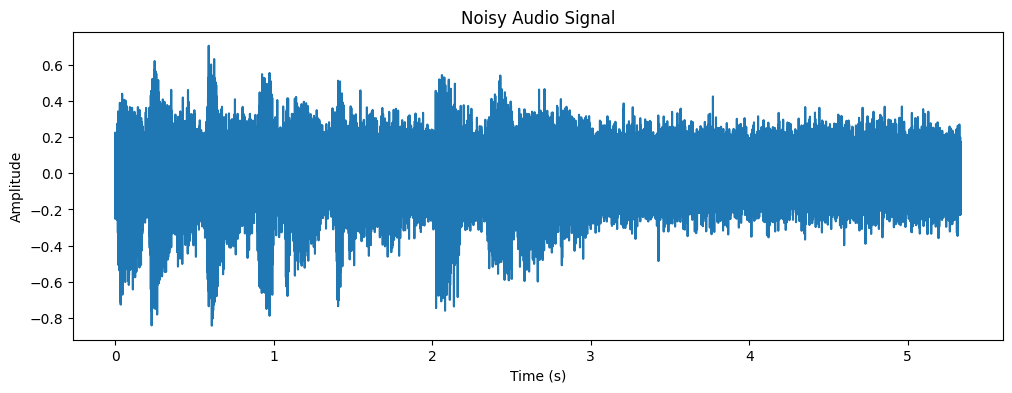

Masking frequencies from 2500 Hz to 3500 Hz.
Masked frequency indices: (array([41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]),)


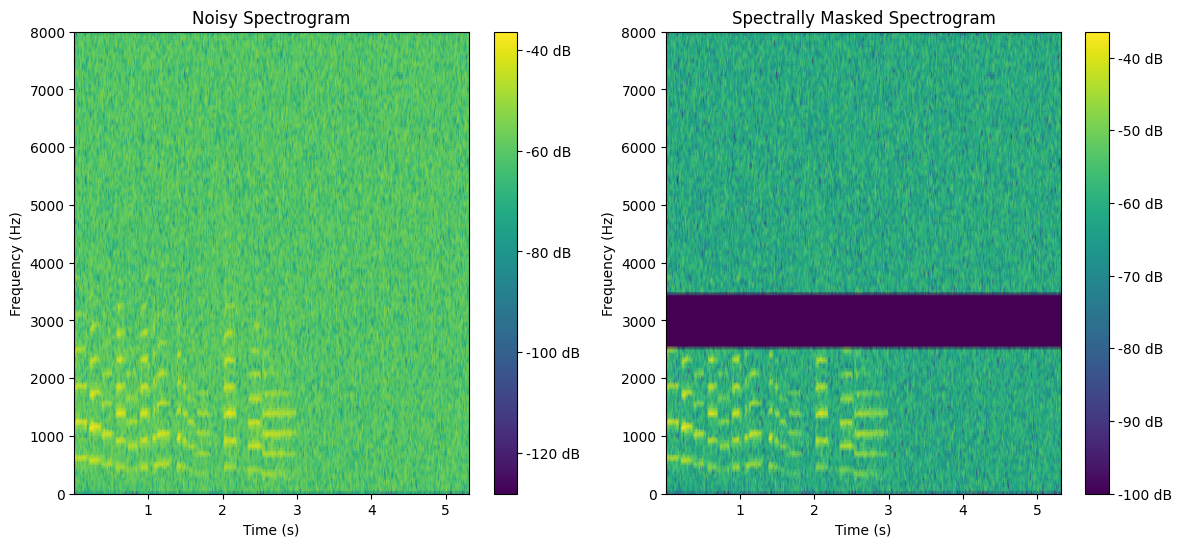

Applying Temporal Masking with threshold=0.1 and smoothing_window=5
Temporal Masking: 12.07% of values were set to zero after masking.



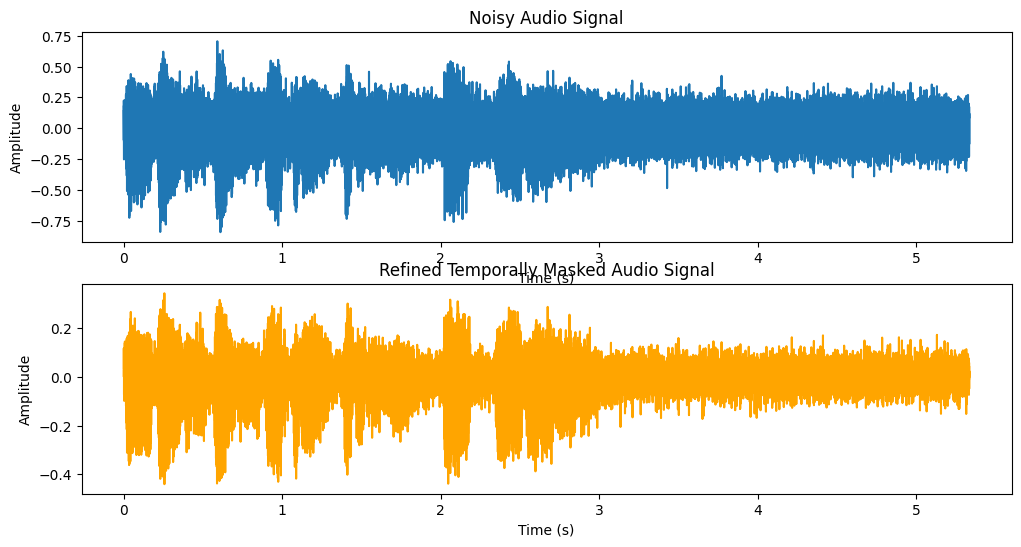

Applying Adaptive Noise Masking with RMS energy=0.1258 and adaptive threshold=0.0126
Adaptive Noise Masking: 9.16% of values were set to zero after masking.



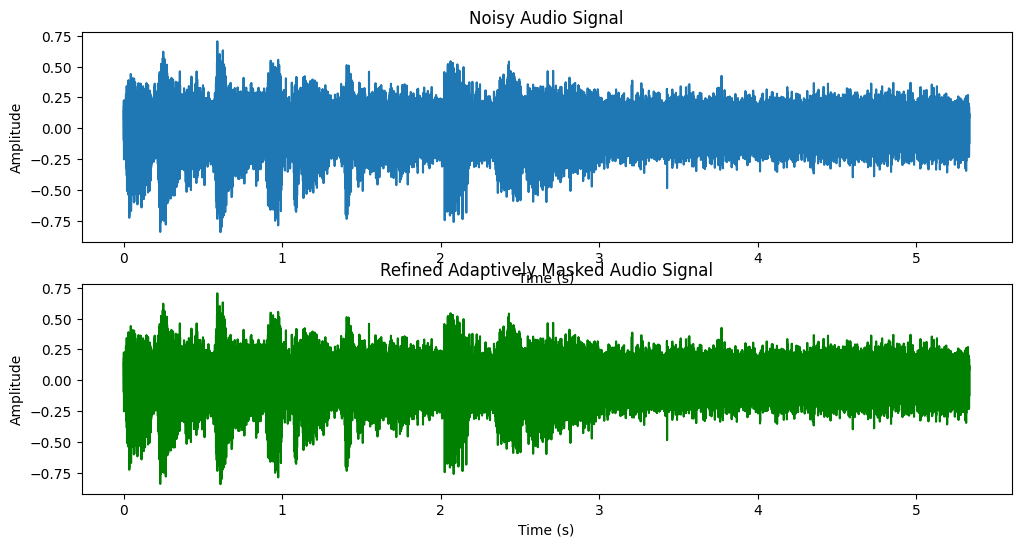

In [7]:


# Load an example audio file
audio_path = librosa.example('trumpet')
y, sr = librosa.load(audio_path, sr=16000)
time = np.linspace(0, len(y) / sr, len(y))

# Add synthetic noise to the signal
np.random.seed(0)
noise = 0.1 * np.random.normal(size=y.shape)  # Adjust noise level for clarity
y_noisy = y + noise

# Plot the noisy signal
plt.figure(figsize=(12, 4))
plt.plot(time, y_noisy)
plt.title("Noisy Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

### 1. Spectral Masking ###
# Spectral masking - reduce certain frequency bands
# Import necessary libraries if not already imported
import numpy as np
import scipy.signal

# Spectral masking - reduce certain frequency bands
def spectral_masking(y, sr, mask_freq=3000, bandwidth=500):
    # Step 1: Compute the spectrogram
    f, t, Sxx = scipy.signal.spectrogram(y, sr)

    # Step 2: Copy the spectrogram for masking
    Sxx_masked = Sxx.copy()

    # Step 3: Define the frequency range to mask
    mask_band = np.logical_and(f > mask_freq - bandwidth, f < mask_freq + bandwidth)

    # Step 4: Apply the mask by setting values in the band to zero
    Sxx_masked[mask_band, :] = 0  # Applying mask

    # Debugging check: Print masked frequency indices and values (optional for testing)
    print(f"Masking frequencies from {mask_freq - bandwidth} Hz to {mask_freq + bandwidth} Hz.")
    print(f"Masked frequency indices: {np.where(mask_band)}")

    return Sxx, Sxx_masked, f, t


# Apply spectral masking
Sxx, Sxx_masked, f, t = spectral_masking(y_noisy, sr)

# Plot original and masked spectrograms
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title("Noisy Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(format='%+2.0f dB')

plt.subplot(1, 2, 2)
plt.pcolormesh(t, f, 10 * np.log10(Sxx_masked + 1e-10), shading='gouraud')  # Adding epsilon to avoid log(0)
plt.title("Spectrally Masked Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(format='%+2.0f dB')
plt.show()

### 2. Temporal Masking ###
# Temporal masking - reduce noise during non-speech intervals
def temporal_masking(y, sr, threshold=0.1, smoothing_window=5):
    # Step 1: Print initial settings
    print(f"Applying Temporal Masking with threshold={threshold} and smoothing_window={smoothing_window}")

    # Step 2: Apply threshold to remove low amplitude noise
    y_masked = y.copy()
    y_masked[np.abs(y) < threshold] = 0  # Set values below threshold to 0

    # Step 3: Apply moving average smoothing for better clarity
    y_smoothed = np.convolve(y_masked, np.ones(smoothing_window) / smoothing_window, mode='same')

    # Print the proportion of values masked
    masked_percentage = 100 * np.sum(np.abs(y_smoothed) == 0) / len(y_smoothed)
    print(f"Temporal Masking: {masked_percentage:.2f}% of values were set to zero after masking.\n")

    return y_smoothed

# Apply refined temporal masking
y_temporal_masked = temporal_masking(y_noisy, sr)

# Plot noisy and temporally masked signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, y_noisy)
plt.title("Noisy Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(time, y_temporal_masked, color='orange')
plt.title("Refined Temporally Masked Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

### 3. Adaptive Noise Masking ###
# Adaptive masking - adjust threshold based on noise level
def adaptive_noise_masking(y, noise_factor=0.1):
    # Step 1: Calculate RMS energy of the signal
    rms_energy = np.sqrt(np.mean(y ** 2))

    # Step 2: Set adaptive threshold based on RMS energy
    adaptive_threshold = rms_energy * noise_factor

    # Print threshold details
    print(f"Applying Adaptive Noise Masking with RMS energy={rms_energy:.4f} and adaptive threshold={adaptive_threshold:.4f}")

    # Step 3: Apply threshold
    y_masked = y.copy()
    y_masked[np.abs(y) < adaptive_threshold] = 0  # Only keep significant portions

    # Print the proportion of values masked
    masked_percentage = 100 * np.sum(np.abs(y_masked) == 0) / len(y_masked)
    print(f"Adaptive Noise Masking: {masked_percentage:.2f}% of values were set to zero after masking.\n")

    return y_masked

# Apply refined adaptive noise masking
y_adaptive_masked = adaptive_noise_masking(y_noisy)

# Plot noisy and adaptively masked signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, y_noisy)
plt.title("Noisy Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(time, y_adaptive_masked, color='green')
plt.title("Refined Adaptively Masked Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
